# A Larger Dataset from Scratch

Created by Dr. Jie Tao, ver. 0.1

## What you need to know in this part
We are putting things together we learned in this course, and some other courses together. Specifically, these knowledge elements include:
- Pandas 
    - DataFrame Operations
    - Plotting
- Markdown
    - Express your analytical ideas
    - Explain your analysis
- Basic Descriptive Analysis from QA500
- Analytics Pipeline from BA500

## What you can do in this part
After completing this part, you should be able to:
- Create and lay out a new Jupyter Notebook
- Collaborate with your peers using Git/Github
- Use Pandas to load and manipulate a large dataset
- Use Dataframe operations to analyze the data
- Use Pandas plotting to plot key statistics

## Step 0: Work with Your Final Group 
Consider this part as the final tryout for the final projects, in a __much smaller__ scale. You should work with the same group of people as the final project.

## Step 1: Study Your Data
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Here is a data dictionary you can use to understand your data, which is available [here](https://www.kaggle.com/c/titanic/data) as well.

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| survival | _Passenger survived or not_ | __0 = No, 1 = Yes__ |
| pclass | _Ticket Class_ | __1 = 1st, 2 = 2nd, 3 = 3rd__ |
| name | _Name of the passenger_ | ... | 
| sex | _Gender of the passenger_ | __male, female__ |
| age | _Age in Years_ | ... |
| sibsp | _# of siblings / spouses aboard the Titanic_ | ... |
| parch | _# of parents / children aboard the Titanic_ | ... |
| ticket | _Ticket number_ | ... |
| fare | _Passenger fare paid_ | ... |
| cabin | _Cabin number_ | ... |
| embarked | _Port of Embarkation_ | __C = Cherbourg, Q = Queenstown, S = Southampton__ |

There are some additional notes for these variables that maybe helpful:

- __pclass__: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- __age__: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- __sibsp__: This feature defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- __parch__: This feature defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

### YOUR TURN HERE
Write a short paragraph here to explain how do you plan to use the data. Specifically, you need to come up with at least 2 _interesting_ __analytical questions__. Also, include a _third_ analytical question for __next steps__ (things you can not do now but plan to do in the future, maybe due to the limitations of time/data/technique). Do not forget mention __how other people should care about your analysis__.

Here are some example questions:
1. Do wemen have a better chance to survive?
2. Do 1st-class passengers have a better chance to survive?

Please do not use these questions directly, come up with something new.

__NOTE:__ you should follow the same structure for your final project.

__Your Analytical Questions below: __


Secondly, the `titanic.csv` file contains all the data you need to use. Let's first load the data in. The DataFrame holding the data should be named as `source_data`.

In [1]:
# DO NOT CHANGE THIS CODE BLOCK
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Load the Data
Hint - you may want to set `PassengerId` as the index of the DataFrame, you can do above by using the `index_col=` argument in `pd.read_csv`.

In [2]:
# read in the csv file called 'titanic.csv' into a pandas' dataframe and call it 'source_data' whereby its index will be 'PassengerId' (n = 1, 2, 3....891)
source_data = pd.read_csv('titanic.csv',index_col = 'PassengerId' )

# display the first 10 rows of the dataframe 'source_data' which contains the titanic dataset
source_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Take the first look at your data

After loading your data, it is most important to see if the data is loaded as expected, you should at least look at _a few rows_ in `source_data`.

In [3]:
# Print a concise summary of the DataFrame 'source_data', including the index data types (dtype) and column data types (dtypes), non-null values and memory usage.
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# show the sum of the missing values for each column in the Dataframe 'source_data'
# More precisely: the sum of the boolean values of each element in the dataframe which are TRUE (TRUE=1, FALSE=0), when testing if the values are NA (TRUE => msising value, FALSE => non-missing value). 
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html
source_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

You should also check how much data are your playing with, in terms of how many instances (rows) and features (columns).

In [5]:
# Return a tuple representing the dimensionality of the DataFrame 'source_data'.
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
source_data.shape

# Dimensions dataframe:
# 891 rows
# 11 columns

(891, 11)

### Determining how much data is missing
The next step is to check how much data is missing - maybe show them in ratio?

In [6]:
# Show the amount of missing elements in each column as a ratio of the total number of elements in that column and calculate this for the entire dataframe called 'source_data', 
# rounded by the nearest 2 decimal points

## 1st method:
# by taking the average of all the TRUE values of which are missing (NA) multiplied by 100 to get the ratio in % of missing elements, 
# in other words: you take the sum of the TRUE values in each column (TRUE=1, FALSE=0) divided by the total number of elements of each column and multiplying by 100 to get the percentage of missing values -
# rounded by nearest two decimal points
(source_data.isna().mean() * 100).round(2)

## 2nd method:
#(source_data.isna().sum()/source_data.shape[0]*100).round(2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

If a column/feature contains more than __50%__ missing, we will drop it in this analysis.

In [7]:
# method 1
# drop the columns which have at least 50% or more missing values (NA)
# thresh means it requires that many non-NA values.
# the threshhold is set to the length of the dataframe, which is 100% (of the number of rows) divided by 2, in order to get 50% (of the number of rows)
# axis=1 means drop column(s) which contain missing values based on the threshold in this case.
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
source_data = source_data.dropna(thresh=len(source_data)/2, axis=1)

# method 2
#source_data = source_data.dropna(thresh=(df_titanic.shape[0]/2), axis=1, how='all')

# test if the column is dropped, namely 'Cabin' with 77.10% missing which is larger than 50% by seeing that the columns are 10 now instead of 11
print(source_data.shape)

# test again by visually checking the column names left are excluding the column name 'Cabin'
source_data.columns

(891, 10)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [8]:
# show the number of missing values remaining for each column in the dataframe 'source_data' and inspect that the 'Cabin' column is indeed dropped
print(source_data.isna().sum())

# test if the column 'Cabin' is dropped with a try/except,
# try to show the pandas series 'Cabin' (a single column), if this results in an error, than print the message to user that 'Cabin' has been deleted from the dataframe
try:
    source_data['Cabin']
except:
    print('*Note: the column \'Cabin\' has been deleted from the dataframe')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
*Note: the column 'Cabin' has been deleted from the dataframe


In [9]:
## Method 1 - Test code
# Test which columns have (more than zero) >0 missing elements 
#criteria = (source_data.loc[:,:].isna().sum() > 0)
# Show for which columns the condition holds True or False
#print(criteria)

## Method 2 - Test code
# Test which columns have less than 50% missing AND more than 0% missing
criteria = ((source_data.isna().mean() * 100).round(2) < 50) & ((source_data.isna().mean() * 100).round(2) > 0)

# Show only the columns for which the following condition holds TRUE: <50% missing AND >0% missing elements
# source: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
print(source_data[criteria.index[criteria]].columns)

Index(['Age', 'Embarked'], dtype='object')


If a column contains less that __50%__ missing, you shoud consider impute it.
- If the feature is __continuous__, you should consider using the _mean/median_;
- If it is __categorical__, you shoud consider using the _mode_.

Create new columns for imputed features. For instance, if the original feature is named `x`, your imputed feature should be `x_imputed`.

In [10]:
# for all the remaining columns which have less than 50% elements missing and more than 0% elements missing, 
# which are the columns 'Age' and 'Embarked' as seen in the previous code-block for the dataframe 'source_data'
# we create new columns, named 'Age_umputed' and 'Embarked_imputed', whereby the elements that are missing will be replaced by the mean and the mode respectively
source_data["Age_imputed"] = source_data["Age"].fillna(source_data["Age"].mean()).round(2)
source_data['Embarked_imputed'] = source_data['Embarked'].fillna(source_data['Embarked'].mode()[0])

# show the mean of the 'Age' column
print('mean of Age column: ', source_data['Age'].mean())
# show the mode of the 'Embarked' column
print('mode of Embarked column: ', source_data['Embarked'].mode()[0])

## Test 1 - Visually
# test previous code if the mean of the age column is replacing the former missing values (NaN) by visually inspecting the dataframe's last 5 rows
# row 889 has a missing element (NaN) for the 'Age' column and 'Age_imputed' has the value of 29.7 in the same row, which is the same value as the calculated mean for the Age column
# conclusion: the missing element in the of 'Age' is correctly replaced by the average of the age in the 'Age_imputed' column
source_data.tail(5)

mean of Age column:  29.69911764705882
mode of Embarked column:  S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed
PassengerId,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,27.0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,19.0,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,29.7,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,26.0,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,32.0,Q


In [11]:
## Test 2 - Code
# test previous code if 'Age_imputed' and 'Embarked_imputed' have indeed 0 missing values (NaN)
# show the number of missing values for each column in the dataframe 'source_data'
print(source_data.isna().sum())

## Test 3 - Code / Boolean
# test previous code with a boolean statement that both newly added columns 'Age_imputed' and 'Emarked_imputed' have 0 missing values (because we replaced them earlier with the mean and mode)
source_data[['Age_imputed', 'Embarked_imputed']].isna().sum() == 0

Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              2
Age_imputed           0
Embarked_imputed      0
dtype: int64


Age_imputed         True
Embarked_imputed    True
dtype: bool

### Check your data types
You should always check the data types after loading the data. First, check the data types (you can use `.dtypes` or `.info()`.

In [12]:
## show the data types of each column in the pandas dataframe
# method 1
source_data.dtypes

# method 2
#source_data.info()

Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Embarked             object
Age_imputed         float64
Embarked_imputed     object
dtype: object

If you see anything not correct above, you should fix it below. Otherwise, write a comment to yourself stating __all data types are correct__.

In [13]:
# all data types are correct except the 'Pclass', 'Sex' and 'Survived' columns which are categorical
# that is why we change the dtype of each of these 3 in turn and overwrite the old data  (dtype)
source_data['Pclass'] = source_data['Pclass'].astype('category')
source_data['Sex'] = source_data['Sex'].astype('category')
source_data['Survived'] = source_data['Survived'].astype('category')
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived            891 non-null category
Pclass              891 non-null category
Name                891 non-null object
Sex                 891 non-null category
Age                 714 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Ticket              891 non-null object
Fare                891 non-null float64
Embarked            889 non-null object
Age_imputed         891 non-null float64
Embarked_imputed    891 non-null object
dtypes: category(3), float64(3), int64(2), object(4)
memory usage: 72.5+ KB


## Step 2: Descriptive Stats

No matter what analytical questions you try to develop/answer, there are some basic statistical questions you need to answer. 

These descriptive statistical analysis can help you gain more insights about your data, to further/tweak your main analytical questions.

### Overall descriptive Stats

For any DataFrame, we should consider look at the generic descriptive statistics, such as _mean_, _median_, _# of unique values_, _standard deviation_, ...

`Pandas` provides a method for that.

In [14]:
## Write your code here
source_data.describe()

,Age,SibSp,Parch,Fare,Age_imputed
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,29.699293
std,14.526497,1.102743,0.806057,49.693429,13.002015
min,0.420000,0.000000,0.000000,0.000000,0.420000
25%,20.125000,0.000000,0.000000,7.910400,22.000000
50%,28.000000,0.000000,0.000000,14.454200,29.700000
75%,38.000000,1.000000,0.000000,31.000000,35.000000
max,80.000000,8.000000,6.000000,512.329200,80.000000


### How many survived?

First thing you may want to know is how many have survived, maybe through a bar chart comparison?

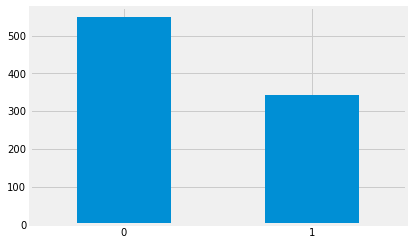

In [15]:
## Write your code here
source_data['Survived'].value_counts().sort_index().plot(kind='bar', rot=0)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:



### How many male vs. female?
Gender (`sex`) is another important feature to group your instances. You may want to check the distribution as well.

number of females:  314
number of males:  577


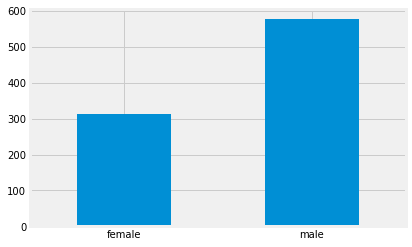

In [16]:
# calculate the number of females on the titanic
print('number of females: ', (source_data['Sex'] == 'female').sum())

# calculate the number of males on the titanic
print('number of males: ', (source_data['Sex'] == 'male').sum())

# plot the barchart of of the number of males and females based on the 'Sex' column of the pandas' dataframe 'soure_data'
source_data['Sex'].value_counts().sort_index().plot(kind='bar', rot=0)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:


In [17]:
# we can infer from the barchart that there are almost twice as many males compared to females on board of the titanic, namely a little over 300 females (314) and almost 580 males (577)

### Different classes
Look at the distribution of different classes are also important.

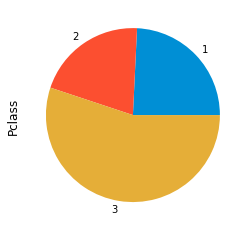

In [18]:
# Plot a Pie chart of 'Pclass'
source_data['Pclass'].value_counts().sort_index().plot(kind='pie')

In [19]:
# Calculate the % of each class within 'Pclass'
source_data['Pclass'].value_counts()/source_data['Pclass'].shape[0]*100

# find unique elements of 'Pclass' and sort them
#sorted(source_data['Pclass'].unique())

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

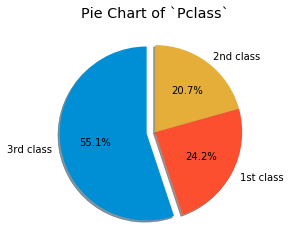

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

# define the labels for each piece of the pie-chart based on the order or the previous codeblock (3-1-2)
labels = '3rd class', '1st class', '2nd class'

# define the sizes of the pie chart in percentages
#sizes = [55.1, 24.2, 20.7]
sizes = (source_data['Pclass'].value_counts()/source_data['Pclass'].shape[0]*100)

# set which slice should be seperated/exploded from the other parts of the pie and how much
explode = (0.1, 0, 0)  # only "explode" the 1st slice

# Creates just a figure and only one subplot - from the matplotlib library which is a 2D plotting library
# source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html
fig_Pclass, ax1 = plt.subplots()

# define the pie chart features, define sizes, explode, labels, autopct %, shadow, startangle
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# set the title of the pie chart and the aspect ratio to equal
ax1.set(aspect="equal", title='Pie Chart of `Pclass`') # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot the Pie-chart of 'Pclass'
plt.show()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

In [21]:
# From the Pie chart it becomes clear that 24.2% were traveling 1st class, 20.7% were traveling 2nd class and 55.1% were traveling 3rd class. Whereby 3rd class > 1st class > 2nd class. 

### How is age distributed?

Looking at the age distribution of the passengers may also be useful.

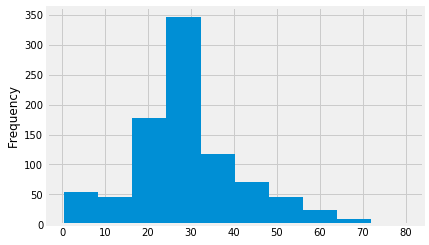

In [22]:
## Write your code here
source_data['Age_imputed'].plot(kind='hist' , bins =10)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

### How is fare distributed?

Looking at the fare distribution of the passengers may also be useful.

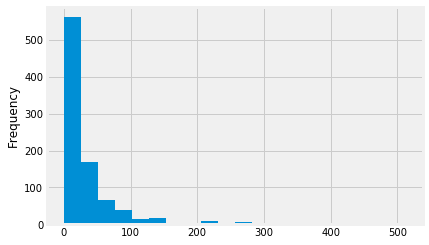

In [27]:
## Write your code here
source_data['Fare'].plot(kind='hist', bins = 20)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

In [ ]:
# most of the fares are between 0-25 dollars (500+ people)
# the 2nd biggest group is with fares between 25-50 dollars
# some outliers are fares between 200-300 dollars

You should ckeck other faetures if you decide to use them in your analysis.

## Step 3: Feature Transformation/Creation

In your analysis, you may need to create some addtional features/columns to further support it. 

Here, we are going to create a few features.

### Creating age group

Grouping age into a categorical feature is always a good strategy to deal with your data. In this analysis, we treat the age grouping use the following logic:

```python
if age < 21:
    'child'
elif age > 60:
    'elder'
else:
    'adult'
```

You should call the new column as `Age_group`.

In [152]:
## write your code here
def my_age(age):
    if age < 21:
        return'child'
    elif age > 60:
        return'elder'
    else:
        return'adult'
    

In [153]:
source_data['Age_group'] = source_data['Age_imputed'].apply(my_age)
source_data.isna().sum()

Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              2
Age_imputed           0
Embarked_imputed      0
Age_group             0
dtype: int64

### Create family and travel_alone

In this dataset, we have two features modeling _family_: `sibsp` and `parch`. Maybe in the analysis we only care about if the passenger is traveling alone or not.

The logic is as following:
1. we are going to combine `sibsp` and `parch` as a new column `family` - just adding them up;
2. create a new column `travel_alone` with the following logic:
```python 
if family == 0:
    'alone'
else:
    'family'
```
Don't forget to test if the calculation is correct.

In [154]:
## write your code here
source_data['Family'] = source_data['SibSp'] + source_data['Parch']
source_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_group,Family
PassengerId,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,27.0,S,adult,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,19.0,S,child,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,29.7,S,adult,3
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,26.0,C,adult,0
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,32.0,Q,adult,0


In [155]:
source_data['Travel_alone'] = source_data['Family'].apply(lambda x : 'alone' if x == 0 else 'family' )
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_group,Family,Travel_alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S,adult,1,family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C,adult,1,family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S,adult,0,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,S,adult,1,family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,S,adult,0,alone


You should create additional features if needed.

## Step 4: Answer Your Analytical Question

Since we have gained enough understanding of the dataset, now we can move forward toward the analytical questions you defined earlier. _Do not hesitate to change your analytical question if needed._

__You should break down this step based on your analytical questions. __

Below is some example I try to answer my example analytical questions.

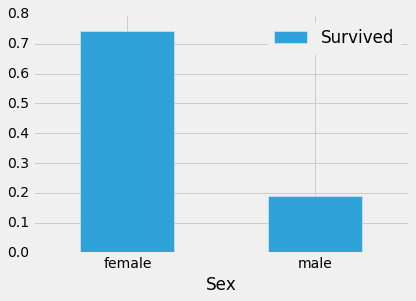

In [20]:
# sex vs. survived
source_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar', rot = 0)

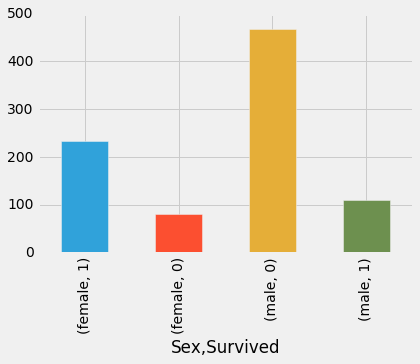

In [21]:
# sex vs. survived
source_data.groupby('Sex')['Survived'].value_counts().plot(kind='bar')

### What can be learned - This is required for all your analytical questions

Based on above visualization, it is clear that the _survival rate_ of _female_ passengers are much higher (>70%). 

Based on the lower visualization, it is clear that in terms of the absolute number, female passengers survived more than male ones, despite the larger number of male passengers on the Titanic.

These findings possibly suggest that the passengers on the Titanic are very __chivalrous__.

### Start Your Own Analysis

Now you can start your own analysis below.

### What can you learn from your analysis, in response toward your analytical question?

Put your analysis here

## Step 5: Next Steps and Wrap Up

In this section, you should discuss the next steps of the analysis. The next steps should be very relevant to the dataset (and your analytical questions), but might not be feasible because of the time/data/technique constraints.

### An Example Next Step

Based on my analytical questions, a natural next step is to analyze how can we use these features (including `Sex`, `Age_group`, ...) to __predict__ whether a passenger would survive or not. This would be the best extension of the analysis I have done so far. However, due to the data limitation (missing a _testing_ dataset to evaluate the predictive model(s)), and the limitations of the predictive modeling techniques (which I will learn in BA 545 next semester), they are not feasible at this point

### Next Steps

Provide your next steps here.

To wrap up, you should provide a few things, including __lessons learned__ and __technical challenges__. These parts are _optional_ in this analysis, but are __required__ in your final project.

- __lessons learned__: these are the generic lessons you have learned in the analysis, such as how to write proper python code (for different analytical purposes), how to write up your analytical results, etc.
- __technocal challenges__: during your analysis, you must have encountered and overcame some technical challenges, such as questions in writing code/handling errors, ...

Writing these two parts would help you further your understanding toward data analysis.

### Wrapping Up

Good job!

In this part, you have completed some _descriptive analyses_ using a famous dataset from scratch. This is a __preview__ of your final project, and you should consider using this notebook as a _template_ for your final project analysis.